In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import plotly.express as px

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
training_set = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023_new/ML5.4%20EDA/titanic.csv')

In [5]:
training_set.shape

(891, 12)

In [6]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
training_set.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
training_set.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
def custom_hist(training_set, title, xlabel, ylabel='Количество', bins=None):
    figsize = (20,6)
    plt.figure(figsize=figsize)
    plt.grid(True)
    plt.title(title)
    plt.hist(training_set, training_set.max().astype(int) if bins is None else bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

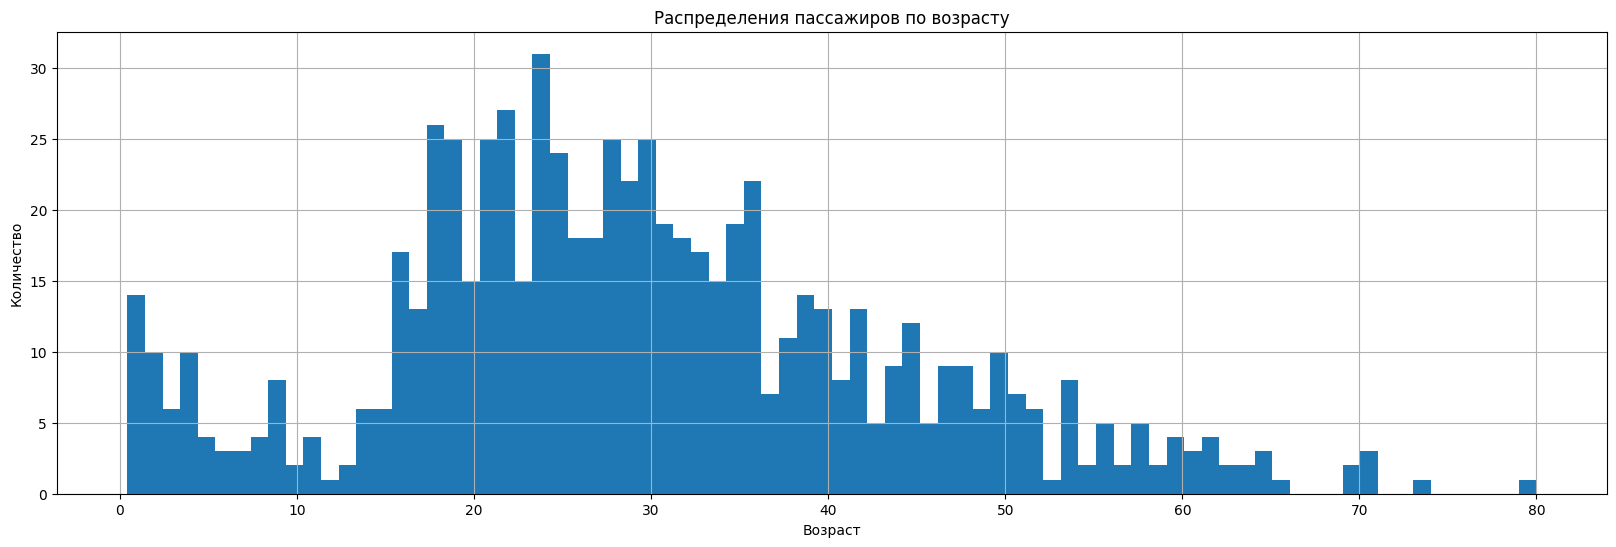

In [10]:
custom_hist(training_set["Age"], 'Распределения пассажиров по возрасту', 'Возраст')

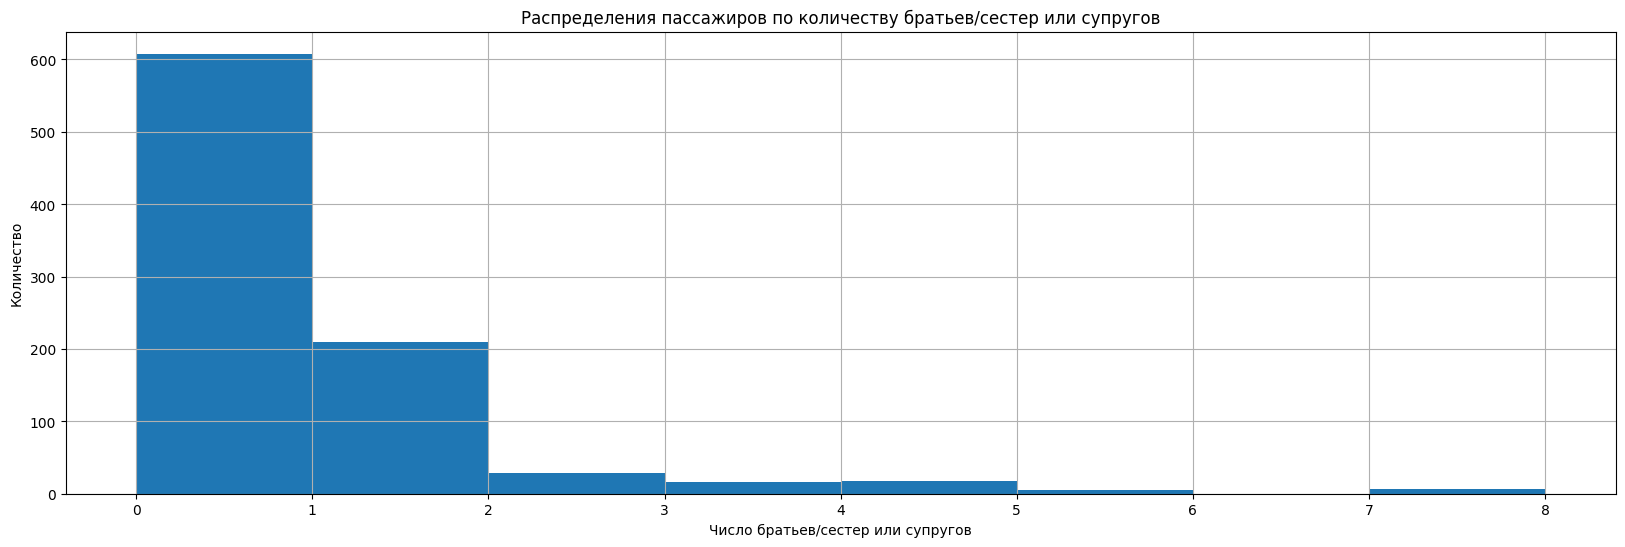

In [11]:
custom_hist(training_set["SibSp"], 'Распределения пассажиров по количеству братьев/сестер или супругов', 'Число братьев/сестер или супругов')

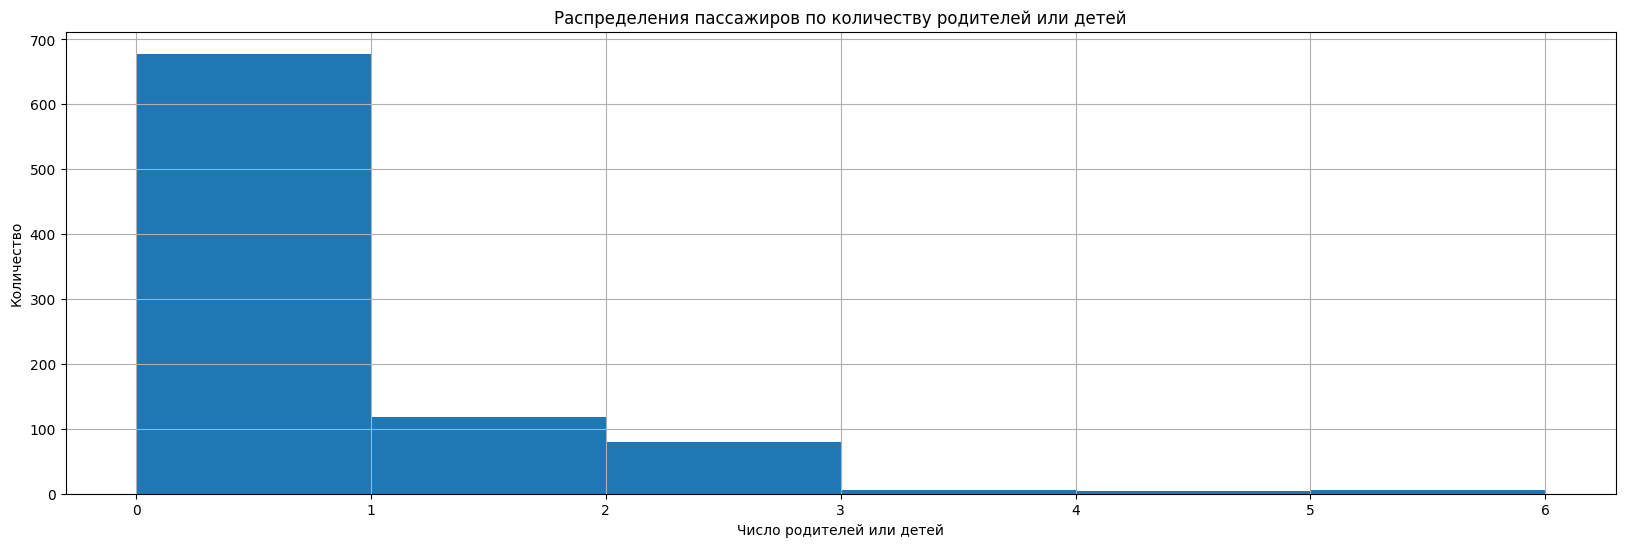

In [12]:
custom_hist(training_set["Parch"], 'Распределения пассажиров по количеству родителей или детей', 'Число родителей или детей')

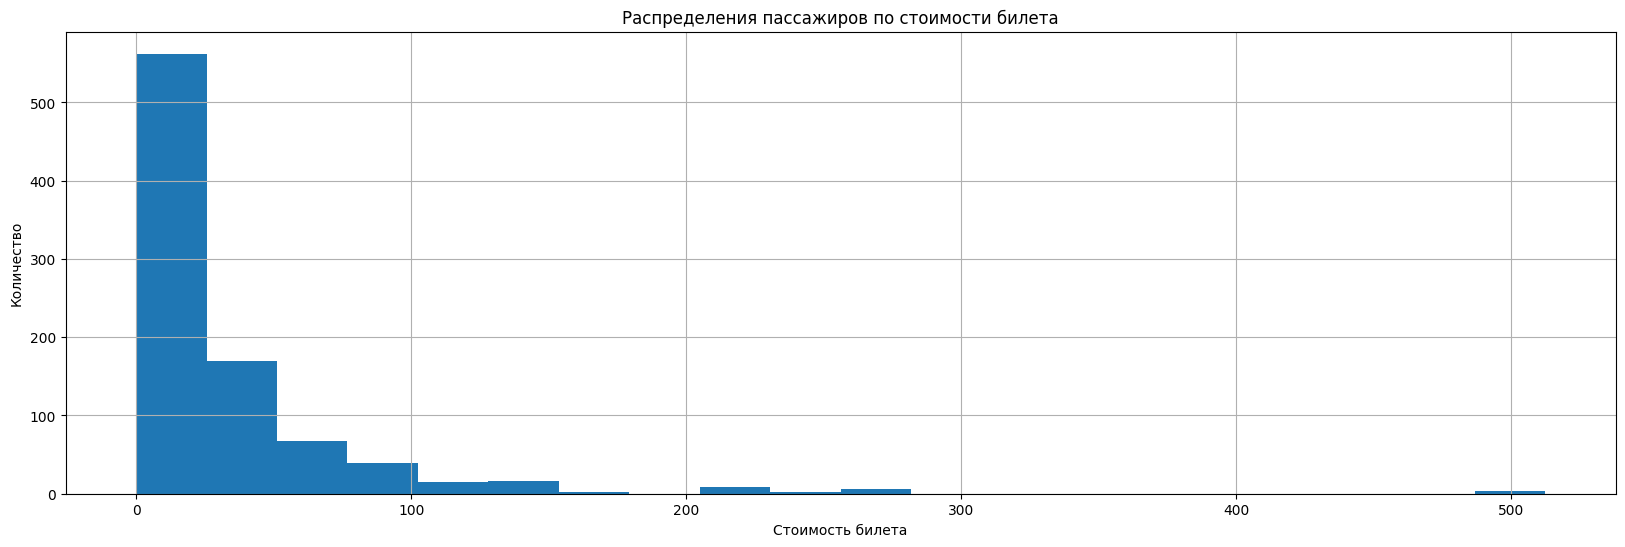

In [13]:
custom_hist(training_set["Fare"], 'Распределения пассажиров по стоимости билета', 'Стоимость билета', bins=20)

<Axes: ylabel='Frequency'>

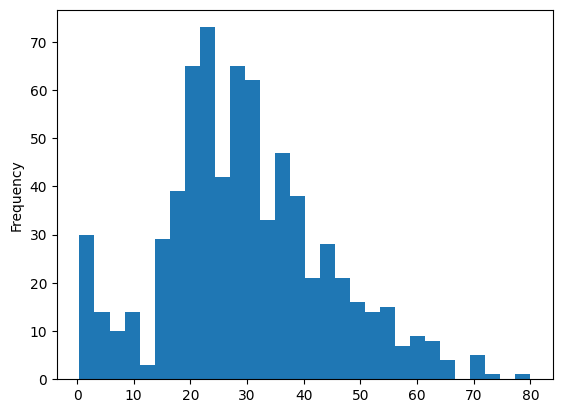

In [14]:
training_set['Age'].plot.hist(bins=30)    #анализ  возраста

<Axes: xlabel='SibSp', ylabel='count'>

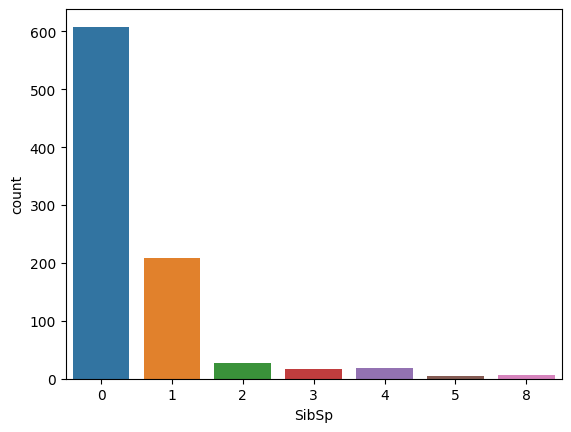

In [15]:
sns.countplot(x='SibSp', data=training_set)

In [16]:
training_set['Fare']    #цена за билет

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

<Axes: >

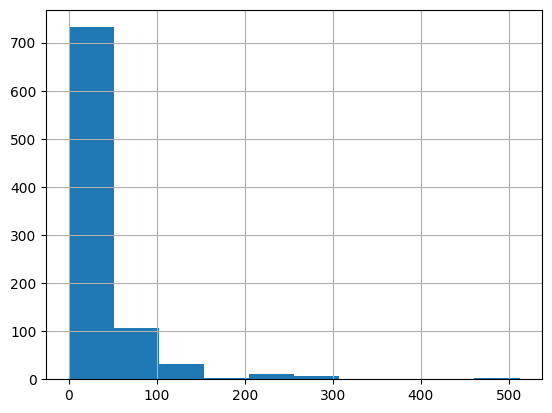

In [17]:
training_set['Fare'].hist()  #гистограмма цен за билет 

<Axes: >

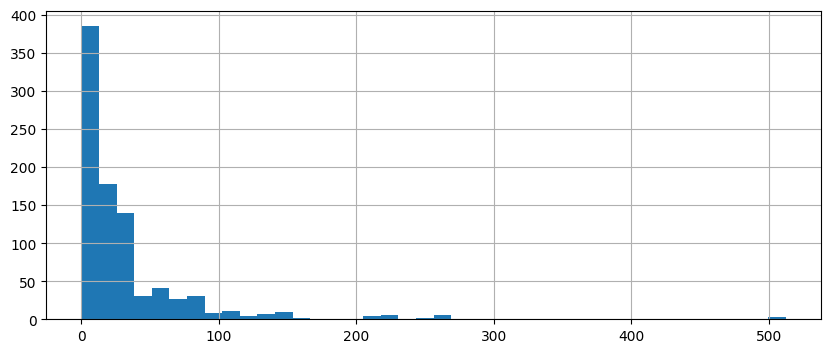

In [18]:
training_set['Fare'].hist(bins=40, figsize=(10,4))   #более точный график что выше

<Axes: xlabel='Survived', ylabel='count'>

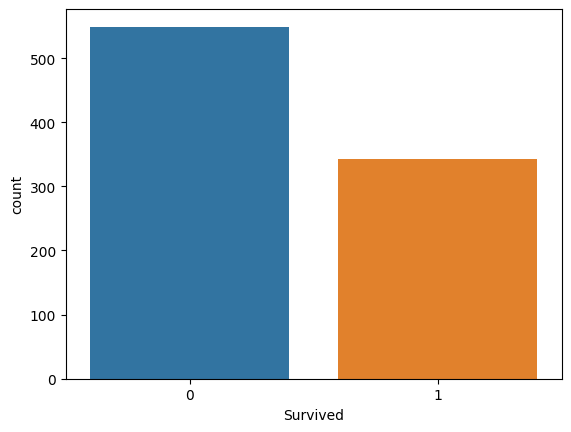

In [19]:
sns.countplot(x='Survived', data=training_set)    #соотношение выживших и не выживших    

<Axes: xlabel='Survived', ylabel='count'>

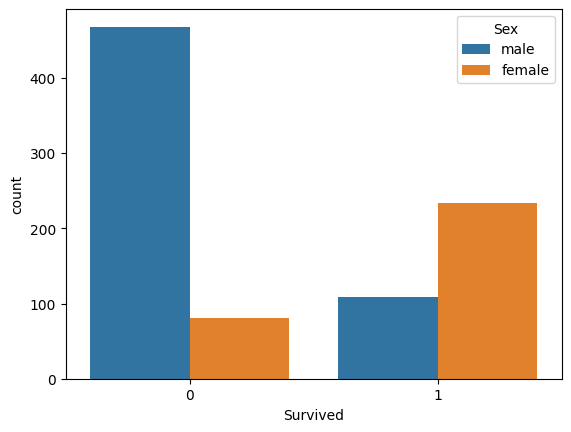

In [20]:
sns.countplot(x='Survived', data=training_set, hue='Sex')  # выжившие и не выжившие + пол

<Axes: xlabel='Survived', ylabel='count'>

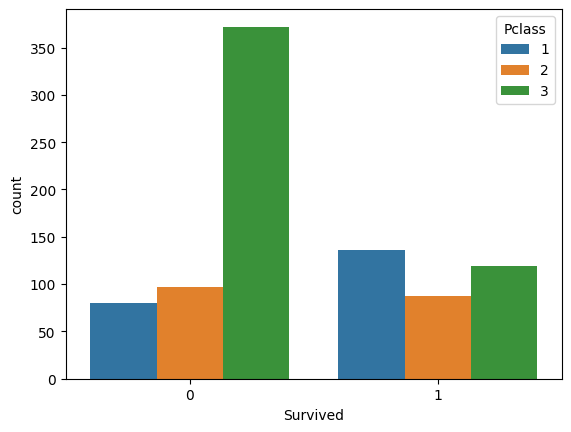

In [21]:
sns.countplot(x='Survived', data=training_set, hue='Pclass')   # выдившие и невыжившие + класс билета

<Axes: xlabel='Pclass', ylabel='Age'>

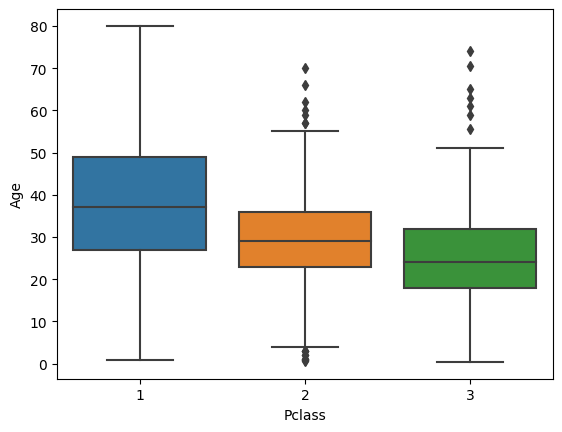

In [22]:
sns.boxplot(x='Pclass', y='Age', data=training_set)   #возраст принадлежащий классу билета

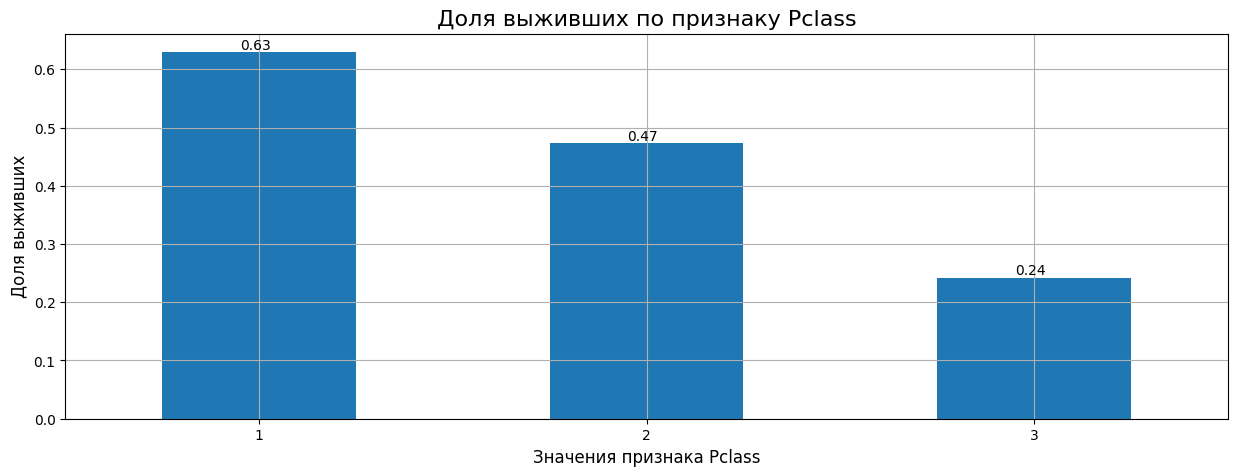

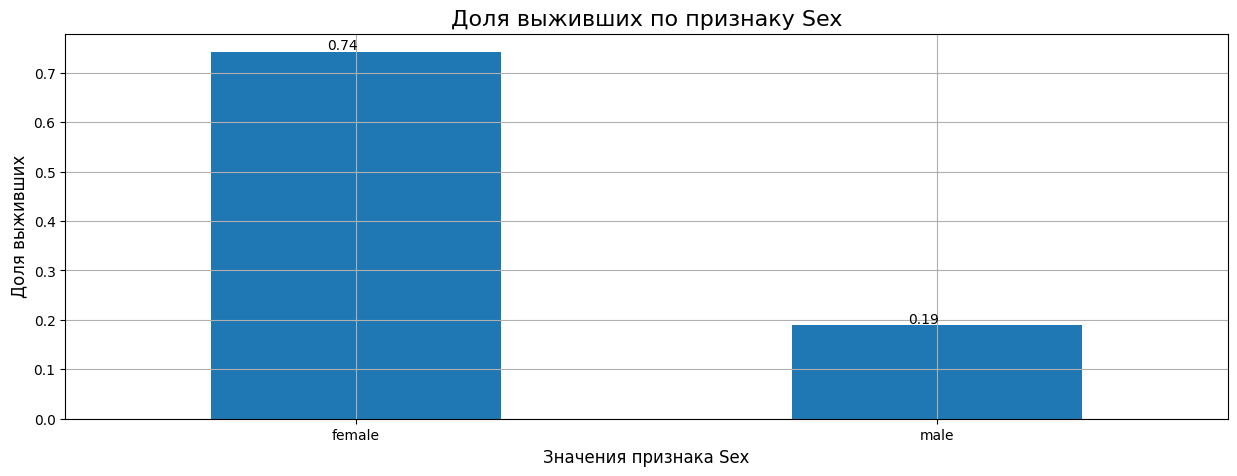

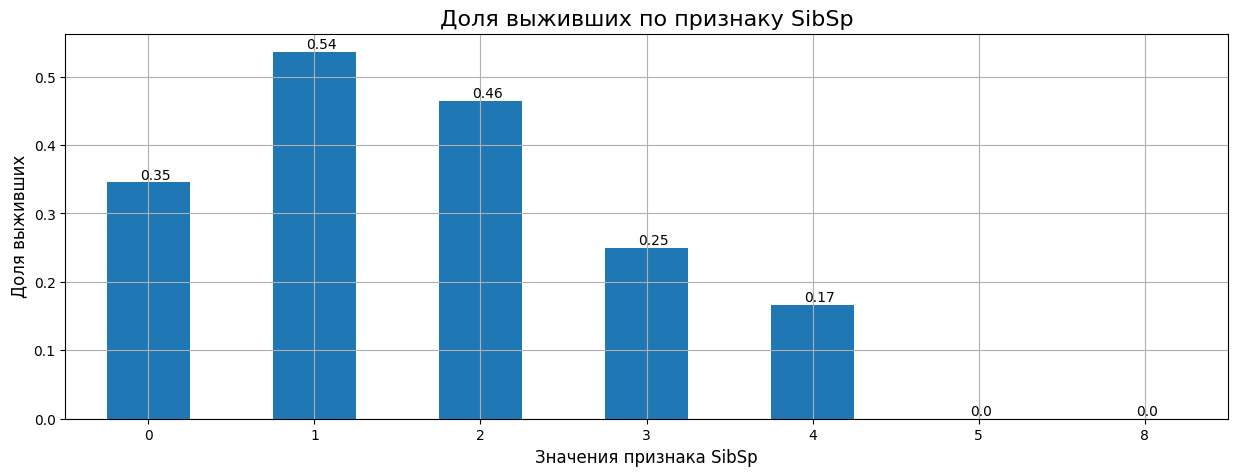

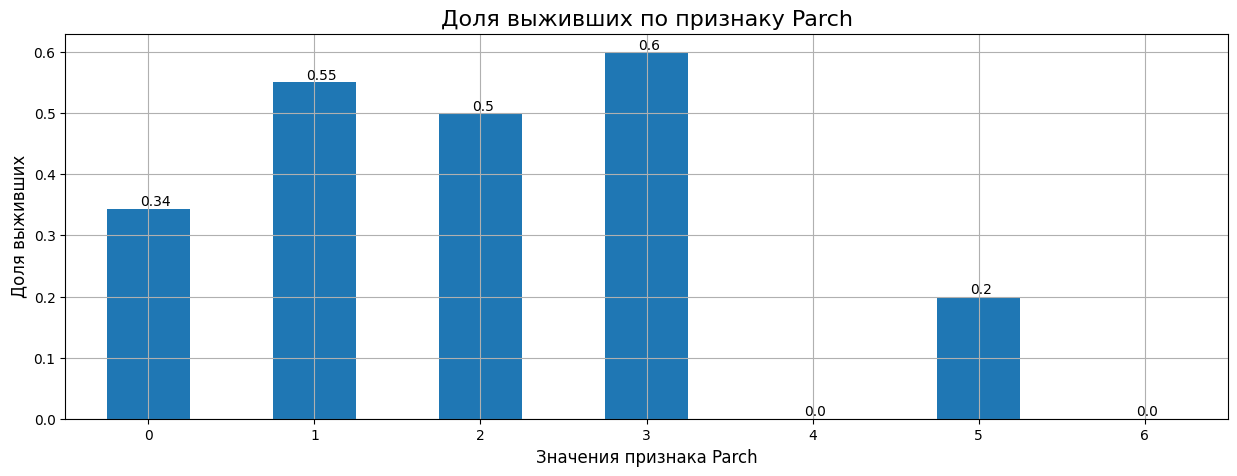

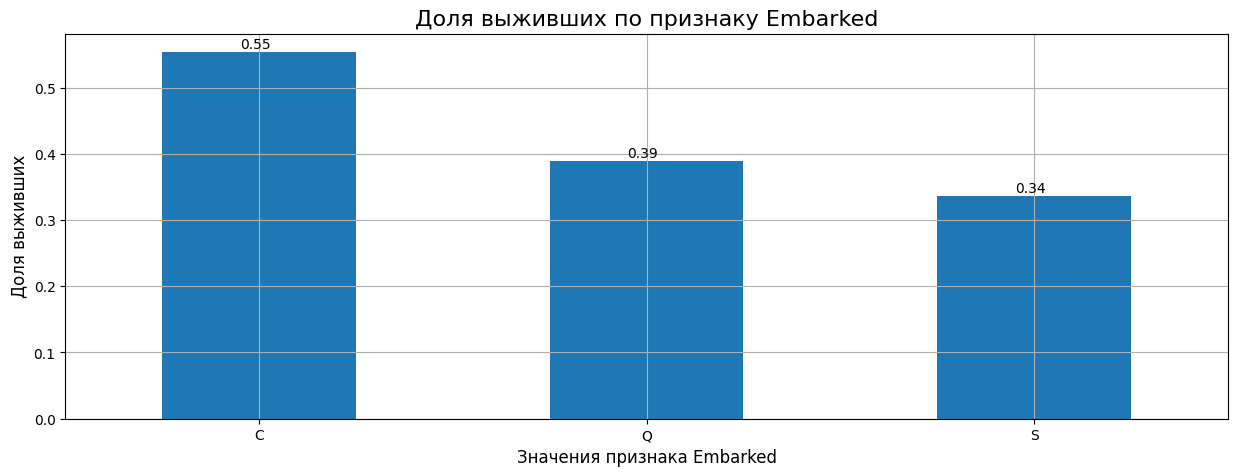

In [23]:
columns_to_look = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for column in columns_to_look:
    pivot = training_set.pivot_table(index=column, values='Survived', aggfunc='mean')
    
    fig, ax = plt.subplots(figsize=(15,5))
    ax.set_title(f'Доля выживших по признаку {column}', fontdict={'size': 16})
    ax.set_ylabel('Доля выживших', fontdict={'size': 12})
    ax.set_xlabel(column, fontdict={'size': 12})
    
    for cnt in range(pivot.shape[0]):
        value = pivot.iloc[cnt].values[0]
        ax.text(cnt - .05, value + .005, round(value, 2))
        
    pivot.plot(kind='bar', rot=0, grid=True, legend=False, ax=ax) 
    ax.set_xlabel(f'Значения признака {column}', fontdict={'size': 12})
    plt.show()

In [24]:
training_set.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
training_set.isnull().sum()   #есть пустые ячейки

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
training_set.isnull()  #смотрим какие именно ячейки пустые

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
training_set.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

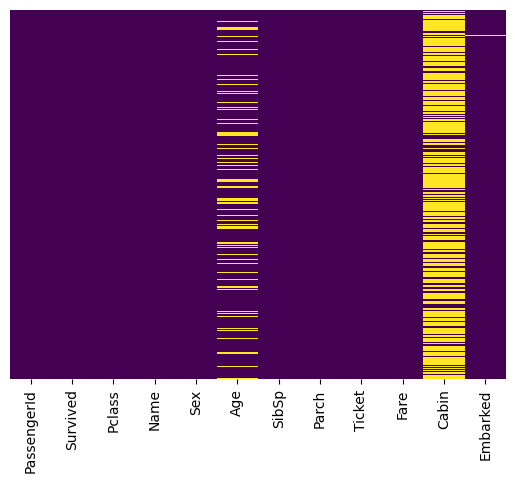

In [28]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')    #смотрим где большинсво пустых ячеек (они желтые)

In [29]:
training_set.drop('Cabin', axis=1, inplace=True)   #столбец cabin не нужен, поэтому можно его удалить 

In [30]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

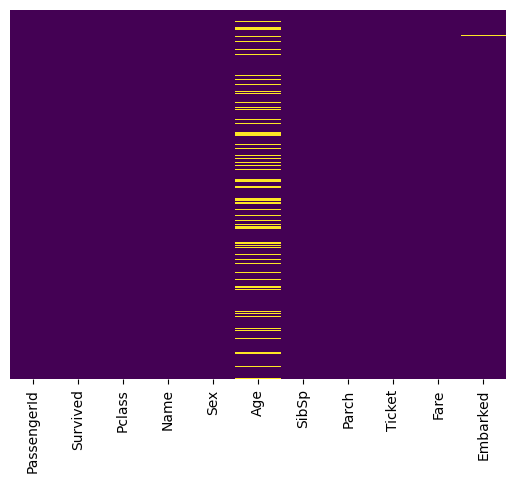

In [31]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')   # проверка, что столбец что мы удалили ушел

In [32]:
training_set.dropna(inplace=True)  #удалили все строки где есть пустые значения

In [33]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

OneHotEncoder - видит эти числовые метки и разделяет данные 
LabelEncoder - для признаков ставит числовые метки 

In [34]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(training_set['Sex'])

In [35]:
training_set['Sex'].unique()

array(['male', 'female'], dtype=object)

In [36]:
np.unique(cat_enc_le)   

array([0, 1])

In [37]:
le.inverse_transform([0,1])  #поставил числовые метки 1 для муж, 0 для жен

array(['female', 'male'], dtype=object)

In [38]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(training_set[['Embarked']])  # Вызываем метод fit_transform, возвращает разреженную матрицу из библиотеки Scipy 

In [39]:
cat_enc_ohe

<712x3 sparse matrix of type '<class 'numpy.float64'>'
	with 712 stored elements in Compressed Sparse Row format>

In [40]:
training_set.shape

(712, 11)

In [41]:
cat_enc_ohe.shape

(712, 3)

In [42]:
pd.get_dummies(training_set['Sex'])  # разделили столбец пол на 2 

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [43]:
pd.get_dummies(training_set['Sex'], drop_first=True)   

,male
0,1
1,0
2,0
3,0
4,1
...,...
885,0
886,1
887,0
889,1


In [44]:
sex = pd.get_dummies(training_set['Sex'], drop_first=True)    #объединили столбцы обратно в столбец пол, где поля теперь бинарные

In [45]:
embark = pd.get_dummies(training_set['Embarked'], drop_first=True) 

In [46]:
embark.head() # сократили кол во портов до двух, тк если не сели ни в первый ни во второй, значит в третий

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [47]:
training_set = pd.concat([training_set, sex, embark], axis=1)

In [48]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [49]:
training_set.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [50]:
training_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


#Задания



In [51]:
y = training_set['Survived']
X = training_set.drop('Survived', axis=1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=542)

In [53]:
model = LogisticRegression()
model.fit(X=X, y=y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.82
Precision: 0.82
Recall: 0.82
F1-score: 0.82


In [55]:
training_set["Survived"].mean()

0.4044943820224719

In [56]:
fig = px.pie(training_set, values='Survived', names='male', color_discrete_sequence=px.colors.sequential.Teal)
fig.show()

In [57]:
cou = training_set.groupby("Pclass")["Pclass"].describe()["count"]  # кол - во людей с каждым классом
cou

Pclass
1    184.0
2    173.0
3    355.0
Name: count, dtype: float64

In [58]:
fig = px.histogram(training_set, x='Pclass')  ## кол - во людей с каждым классом наглядно
fig.show()

In [59]:
training_set[training_set["Pclass"] == cou[cou == cou.max()].index[0]]["male"].max()

1

In [60]:
training_set["Age"].corr(training_set["Fare"])

0.09314251789411518

In [61]:
import plotly.express as px
fig = px.scatter(training_set, x="Age", y="Fare")
fig.show()

In [62]:
training_set["Survived"].corr(training_set["Fare"])

0.26609960047658043

In [63]:
training_set[training_set["Survived"] == 1]["Fare"].mean()

51.647671875

In [64]:
training_set[training_set["Survived"] == 0]["Fare"].mean()

22.96545636792453

In [65]:
training_set["Survived"].corr(training_set["Pclass"])

-0.35646158844523845

In [66]:
fig = px.pie(training_set, values='Survived', names='Pclass', color_discrete_sequence=px.colors.sequential.Teal)
fig.show()

In [67]:
# Какова связь между стоимостью билета и портом отправления?

In [68]:
training_set["Fare"].describe()[["min", "mean", "max"]]

min       0.000000
mean     34.567251
max     512.329200
Name: Fare, dtype: float64

In [69]:
training_set[training_set["S"] == 1]["Fare"].describe()[["min", "mean", "max"]]

min       0.000000
mean     27.476284
max     263.000000
Name: Fare, dtype: float64

In [70]:
import plotly.graph_objects as go
import numpy as np

bins = np.linspace(0, training_set["Fare"].max(), 50)
alpha = 0.6

fig = go.Figure()

fig.add_trace(go.Histogram(
    x=training_set[(training_set["Q"] != 1) & (training_set["S"] != 1)]["Fare"],
    nbinsx=50,
    opacity=alpha,
    name='Cherbourg'
))

fig.add_trace(go.Histogram(
    x=training_set[training_set["Q"] == 1]["Fare"],
    nbinsx=50,
    opacity=alpha,
    name='Queenstown'
))

fig.add_trace(go.Histogram(
    x=training_set[training_set["S"] == 1]["Fare"],
    nbinsx=50,
    opacity=alpha,
    name='Southampton'
))

fig.update_layout(
    title='Распределения стоимостей билетов в зависимости от места посадки',
    xaxis_title='Стоимость',
    yaxis_title='Количество',
    legend_title='Embarked'
)

fig.show()

Виды визуализации для машинного обучения:\
Линейные графики, графики рассеивания, хитмапы, ящики с усами (boxplot)\

Boxplot - ящик с усами, вид визуализации, который показывает средние значения, медиану в значениях, а также выбросы (значения, которые сильно отличаются от остальных)\
Для анализа двух непрерывных переменных (в контексте этой лабы, это класс билета и возраст, связь между ними) можно использовать хитмапы и ящики с усами\
Для анализа дискретных переменных (они могут принимать любое значение из какого о множества, например пол - это дискретная переменная) - можно использовать столбчатые диаграммы или хитмапы\
Для распределения непрерывной и дискретной переменной можно использовать - boxplot\

для всей остальных можно тоже использовать box plot или же pyplot с разделением по цветам

